In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd

## load the precomputed data

In [2]:
files = os.listdir('../wasser/daily/')

In [3]:
supermedian_files = [x for x in files if 'Super' in x]

In [5]:
supermedian_files_BL = [x for x in supermedian_files if 'BL' in x]
supermedian_files_PPS = [x for x in supermedian_files if 'PPS' in x]
models = [supermedian_files_PPS[x].split('_')[0] for x in range(10)]

In [7]:
model_names =['PPS '+str(i+1) for i in range(7)] +['Control '+str(i+1) for i in range(3)]

In [10]:
# computing the supramedian fractions for the epileptogenesis periods for all test animals
all_epg_fractions=[]
for i, f in enumerate(supermedian_files_PPS):
    d = pd.read_csv('../wasser/daily/'+f, header=None)
    # each row in d is a day
    # d[3] = number of one-second segments in a day (variable according to rejected trials due to artifacts in the preprocessing stage)
    # d[4] = number of one-second segments in that day that exceeds the median of the training distribution.
    epg_fractions = np.array(d[3])/np.array(d[2])
    all_epg_fractions.append(epg_fractions)

In [11]:
# computing the supramedian fractions for the baseline periods for all test animals
all_valid_fractions=[]
for i, f in enumerate(supermedian_files_BL):
    d = pd.read_csv('../wasser/daily/'+f, header=None)
    valid_fractions = np.array(d[3])/np.array(d[2])
    all_valid_fractions.append(valid_fractions)

## Plotting

In [13]:
figures_folder = '../figures2/'

In [14]:
cm = 1/2.54

labels_font = 10
legend_font = 8
ticks_font = 8
title_font = 12

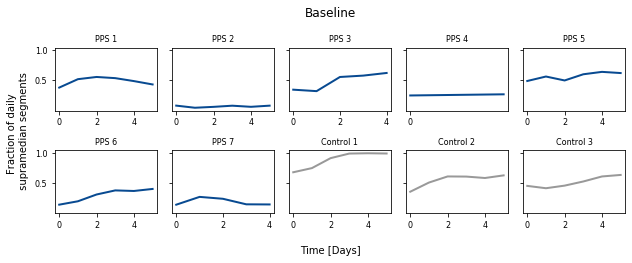

In [16]:
f, axs = plt.subplots(int(np.ceil(len(all_valid_fractions)/5)), 5, sharex=False, sharey=True)
f.set_figheight(int(np.ceil(len(all_valid_fractions)/5))*1.5)
f.set_figwidth(8.5)
axs = axs.flat
for i in range(len(all_valid_fractions)):
    if '326' in models[i][:]:
        axs[i].plot(all_valid_fractions[i], linestyle='-', color=plt.cm.gray(0.6), linewidth=2)
    else:
        axs[i].plot(all_valid_fractions[i], linewidth=2, color=plt.cm.Blues(0.9))  
    axs[i].set_title(model_names[i][:], fontsize=legend_font)
    axs[i].tick_params(axis='x', labelsize=ticks_font)
    axs[i].tick_params(axis='y', labelsize=ticks_font)
    axs[i].set_xticks(np.arange(0,len(all_valid_fractions[i]), 2))

f.text(0.5, -0.05, 'Time [Days]', ha='center', va='center', fontsize=labels_font);
f.text(-0.01, 0.5, 'Fraction of daily \n supramedian segments', ha='center', va='center', rotation='vertical', fontsize=labels_font);
f.text(0.5, 1.05, 'Baseline', ha='center', va='center', fontsize=title_font);
f.tight_layout()
# plt.savefig(figures_folder+'Baseline_supramedians.pdf',bbox_inches='tight')

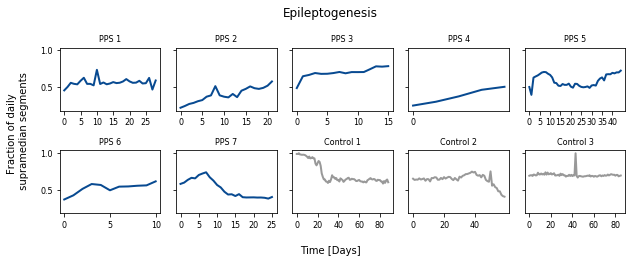

In [17]:
f, axs = plt.subplots(int(np.ceil(len(all_epg_fractions)/5)), 5, sharex=False, sharey=True)
f.set_figheight(int(np.ceil(len(all_epg_fractions)/5))*1.5)
f.set_figwidth(8.5)
axs = axs.flat
for i in range(len(all_epg_fractions)):
    if '326' in models[i][:]:
        axs[i].plot(all_epg_fractions[i], linestyle='-', color=plt.cm.gray(0.6), linewidth=2)
    else:
        axs[i].plot(all_epg_fractions[i], linewidth=2, color=plt.cm.Blues(0.9))  
    axs[i].set_title(model_names[i][:], fontsize=legend_font)
    axs[i].tick_params(axis='x', labelsize=ticks_font)
    axs[i].tick_params(axis='y', labelsize=ticks_font)
    if '326' in models[i][:]:
        axs[i].set_xticks(np.arange(0,len(all_epg_fractions[i]), 20))
    else:
        axs[i].set_xticks(np.arange(0,len(all_epg_fractions[i]), 5))

f.text(0.5, -0.05, 'Time [Days]', ha='center', va='center', fontsize=labels_font);
f.text(-0.01, 0.5, 'Fraction of daily \n supramedian segments', ha='center', va='center', rotation='vertical', fontsize=labels_font);
f.text(0.5, 1.05, 'Epileptogenesis', ha='center', va='center', fontsize=title_font);
f.tight_layout()
# plt.savefig(figures_folder+'EPG_supramedians.pdf',bbox_inches='tight')

In [18]:
# selecting first and last day
early_late_valid_fractions = [[x[0], x[-1]] for x in all_valid_fractions]
early_late_epg_fractions = [[x[0], x[-1]] for x in all_epg_fractions]
early_late_epg_fractions = np.array(early_late_epg_fractions)
early_late_valid_fractions = np.array(early_late_valid_fractions)

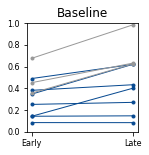

In [21]:
plt.figure(figsize=(2,2))
for i in range(len(early_late_valid_fractions)):
    if '326' in models[i][:]:
        plt.plot(early_late_valid_fractions[i],
                 linestyle='-',
                 linewidth=1,
                 color=plt.cm.gray(0.6),
                 marker='.',
                 label=models[i][:])
    else:
        plt.plot(early_late_valid_fractions[i],
                 linewidth=1,
                 color=plt.cm.Blues(0.9),
                 marker='.',
                 label=models[i][:])  
        
plt.xticks([0,1], ['Early', 'Late'], fontsize=ticks_font)
plt.yticks(np.arange(0,1.1,0.2), fontsize=ticks_font)
# plt.legend() 
plt.title('Baseline', fontsize=title_font)
plt.ylim([0,1]);

plt.savefig(figures_folder+'baseline_paired.pdf',bbox_inches='tight')

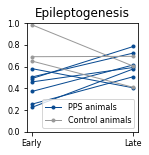

In [22]:
plt.figure(figsize=(2,2))
for i in range(len(early_late_epg_fractions)):
    if '326' in models[i][:]:
        plt.plot(early_late_epg_fractions[i],
                 linestyle='-',
                 linewidth=1,
                marker='.',
                 color=plt.cm.gray(0.6),
                 label='Control animals')
    else:
        plt.plot(early_late_epg_fractions[i],
                 linewidth=1,
                 color=plt.cm.Blues(0.9),
                  marker='.',
                 label='PPS animals')
plt.xticks([0,1], ['Early', 'Late'], fontsize=ticks_font)
plt.yticks(np.arange(0,1.1,0.2), fontsize=ticks_font)
plt.title('Epileptogenesis', fontsize=title_font)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), fontsize=legend_font, loc='lower right')

plt.ylim([0,1]);
# plt.savefig(figures_folder+'epg_paired.pdf',bbox_inches='tight')

In [23]:
# computing the percentage change between early and late phases of each period
#baseline
early_late_ratio_valid = [(x[1]-x[0])/x[0]*100 for x in early_late_valid_fractions]
#epileptogenesis
early_late_ratio_epg = [(x[1]-x[0])/x[0]*100 for x in early_late_epg_fractions]

early_late_ratio_valid = np.array(early_late_ratio_valid)
early_late_ratio_epg = np.array(early_late_ratio_epg)

In [26]:
control_mask = np.array(['326' in x for x in models])
pps_mask = ~control_mask

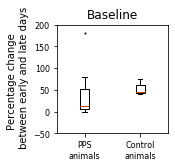

In [32]:
plt.figure(figsize=(2,2))
medianprops = dict(linestyle='-', linewidth=1, color=plt.cm.Oranges(0.8))
boxprops = dict(linestyle='-', linewidth=1)
flierprops = dict(markersize=1)
whiskerprops = dict(linestyle='-', linewidth=1)
plt.boxplot([early_late_ratio_valid[pps_mask], 
             early_late_ratio_valid[control_mask]],
            showmeans=False, 
            meanline=True,
            medianprops=medianprops,
            boxprops=boxprops,
            flierprops=flierprops,
            whiskerprops=whiskerprops,
            capprops=whiskerprops);
plt.yticks(fontsize=ticks_font)
plt.ylim([-50,200])
plt.xticks([1,2], ['PPS\nanimals', 'Control\nanimals'], rotation=0,fontsize=ticks_font);
plt.title('Baseline', fontsize=title_font);
plt.ylabel('Percentage change \n between early and late days', fontsize=labels_font);
# plt.savefig(figures_folder+'boxplot_baseline.pdf',bbox_inches='tight')

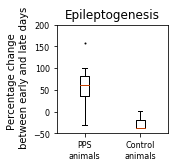

In [33]:

plt.figure(figsize=(2,2))
medianprops = dict(linestyle='-', linewidth=1, color=plt.cm.Oranges(0.8))
boxprops = dict(linestyle='-', linewidth=1)
flierprops = dict(markersize=1)
whiskerprops = dict(linestyle='-', linewidth=1)
plt.boxplot([early_late_ratio_epg[pps_mask],
             early_late_ratio_epg[control_mask]],
            showmeans=False, 
            meanline=True,
            medianprops=medianprops,
            boxprops=boxprops,
            flierprops=flierprops,
            whiskerprops=whiskerprops,
            capprops=whiskerprops);
plt.yticks(fontsize=ticks_font)
plt.ylim([-50,200])
plt.xticks([1,2], ['PPS\nanimals', 'Control\nanimals'], rotation=0, fontsize=ticks_font);
plt.title('Epileptogenesis', fontsize=title_font);
plt.ylabel('Percentage change \n between early and late days', fontsize=labels_font);
# plt.savefig(figures_folder+'boxplot_epg.pdf',bbox_inches='tight')